#LOGISTIC REGRESSION PROJECT - 1

#Predicting Ad Clicks with Logistic Regression

I will be working with a advertising data set, indicating whether or not a particular internet user clicked on an Advertisement on a company website. I will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

#IMPORTS

In [7]:
#Import numpy and pandas
import numpy as np
import pandas as pd

In [9]:
#Import Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#GET THE DATA

In [11]:
#Read advertising.csv and set it to a dataframe df
df = pd.read_csv('advertising.csv')

In [13]:
#Check head of df
df.head()

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                     68.95   35     61833.90                256.09   
1                     80.23   31     68441.85                193.77   
2                     69.47   26     59785.94                236.50   
3                     74.15   29     54806.18                245.89   
4                     68.37   35     73889.99                225.58   

                           Ad Topic Line            City  Male     Country  \
0     Cloned 5thgeneration orchestration     Wrightburgh     0     Tunisia   
1     Monitored national standardization       West Jodi     1       Nauru   
2       Organic bottom-line service-desk        Davidton     0  San Marino   
3  Triple-buffered reciprocal time-frame  West Terrifurt     1       Italy   
4          Robust logistical utilization    South Manuel     0     Iceland   

             Timestamp  Clicked on Ad  
0  2016-03-27 00:53:11              0  
1  2016-04-04 01:39:02              0  
2  2016-03-13 20:35:42              0  
3  2016-01-10 02:31:19              0  
4  2016-06-03 03:36:18              0

In [15]:
#Use info on data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.3+ KB


In [17]:
#Use describe() on data
df.describe()

Daily Time Spent on Site          Age   Area Income  \
count               1000.000000  1000.000000   1000.000000   
mean                  65.000200    36.009000  55000.000080   
std                   15.853615     8.785562  13414.634022   
min                   32.600000    19.000000  13996.500000   
25%                   51.360000    29.000000  47031.802500   
50%                   68.215000    35.000000  57012.300000   
75%                   78.547500    42.000000  65470.635000   
max                   91.430000    61.000000  79484.800000   

       Daily Internet Usage         Male  Clicked on Ad  
count           1000.000000  1000.000000     1000.00000  
mean             180.000100     0.481000        0.50000  
std               43.902339     0.499889        0.50025  
min              104.780000     0.000000        0.00000  
25%              138.830000     0.000000        0.00000  
50%              183.130000     0.000000        0.50000  
75%              218.792500     1.000000        1.00000  
max              269.960000     1.000000        1.00000

#EXPLORATORY DATA ANALYSIS

In [24]:
#Making Appearance Good
sns.set_style('whitegrid')

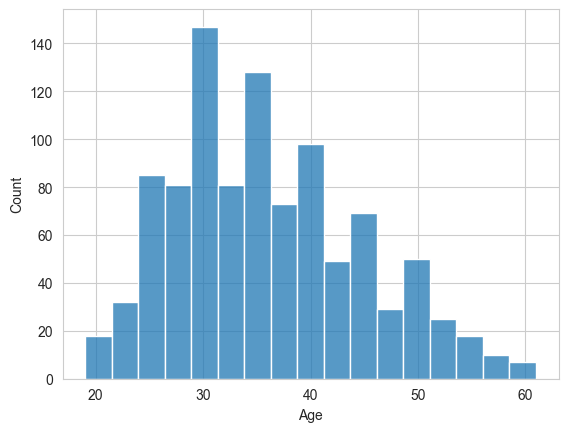

In [28]:
#Histogram Of Age
sns.histplot(df['Age'])
plt.grid(True)

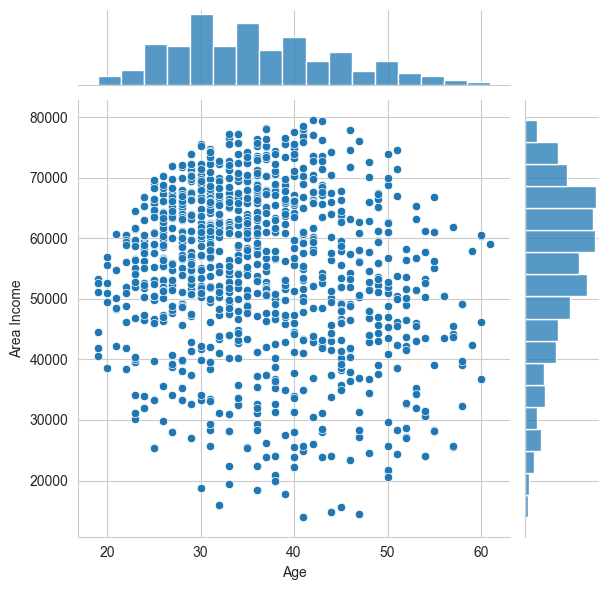

In [32]:
#Jointplot showing Area Income vs Age
sns.jointplot(data=df,y='Area Income',x='Age')

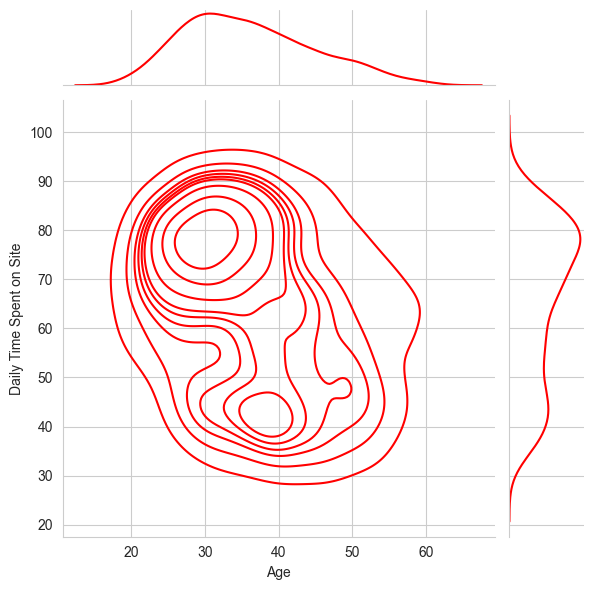

In [44]:
#Jointplot showing the kde distributions of Daily Time spent on site vs. Age
sns.jointplot(data=df,x='Age',y='Daily Time Spent on Site',kind='kde',color='red')

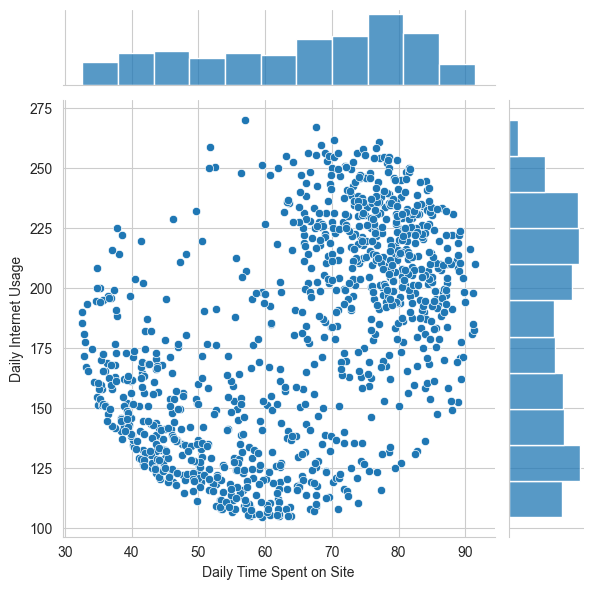

In [46]:
#Jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=df)

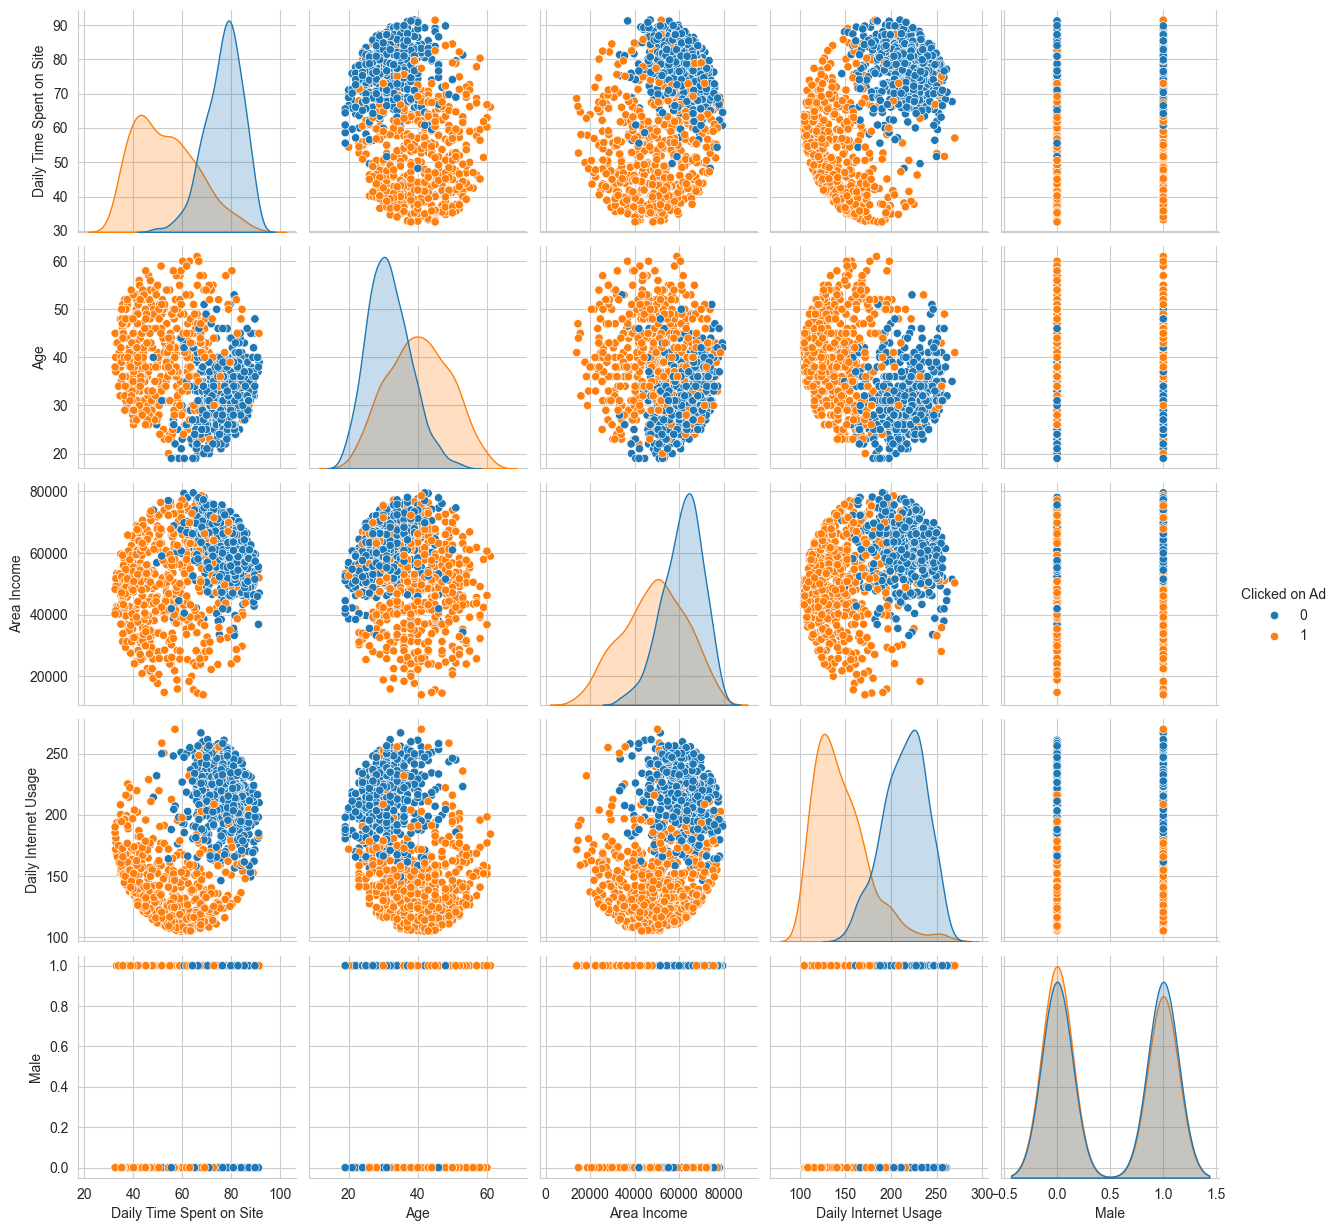

In [48]:
#Pairplot with the hue defined by the 'Clicked on Ad' column feature
sns.pairplot(df,hue='Clicked on Ad')

#LOGISTIC REGRESSION

In [57]:
#Now we will choose our independent and dependent variable
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [59]:
x = df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage','Male']]
y= df['Clicked on Ad']

In [61]:
x

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
0                       68.95   35     61833.90                256.09     0
1                       80.23   31     68441.85                193.77     1
2                       69.47   26     59785.94                236.50     0
3                       74.15   29     54806.18                245.89     1
4                       68.37   35     73889.99                225.58     0
..                        ...  ...          ...                   ...   ...
995                     72.97   30     71384.57                208.58     1
996                     51.30   45     67782.17                134.42     1
997                     51.63   51     42415.72                120.37     1
998                     55.55   19     41920.79                187.95     0
999                     45.01   26     29875.80                178.35     0

[1000 rows x 5 columns]

In [63]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

In [69]:
#Perform train_test_split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [71]:
x_train

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
703                     77.65   28     66198.66                208.01     0
311                     69.74   49     66524.80                243.37     0
722                     39.47   43     65576.05                163.48     1
629                     73.94   26     55411.06                236.15     1
0                       68.95   35     61833.90                256.09     0
..                        ...  ...          ...                   ...   ...
106                     72.23   25     46557.92                241.03     1
270                     44.49   53     63100.13                168.00     1
860                     91.37   45     51920.49                182.65     1
435                     56.66   42     72684.44                139.42     0
102                     89.91   40     59593.56                194.23     0

[670 rows x 5 columns]

In [73]:
x_test

Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  Male
521                     63.26   29     54787.37                120.46     1
737                     71.23   52     41521.28                122.59     0
740                     43.63   38     61757.12                135.25     1
660                     42.04   49     67323.00                182.11     0
411                     78.68   29     66225.72                208.05     0
..                        ...  ...          ...                   ...   ...
506                     77.05   31     62161.26                236.64     0
342                     88.12   38     46653.75                230.91     0
485                     66.88   35     62790.96                119.47     1
711                     69.96   31     73413.87                214.06     1
133                     75.70   29     67633.44                215.44     0

[330 rows x 5 columns]

In [75]:
y_train

703    0
311    0
722    1
629    0
0      0
      ..
106    0
270    1
860    1
435    1
102    0
Name: Clicked on Ad, Length: 670, dtype: int64

In [77]:
y_test

521    1
737    1
740    1
660    1
411    0
      ..
506    0
342    0
485    1
711    0
133    0
Name: Clicked on Ad, Length: 330, dtype: int64

In [81]:
# Importing the Logistic Regression model from the sklearn library
from sklearn.linear_model import LogisticRegression

In [85]:
# Creating a Logistic Regression model with a maximum of 700 iterations for convergence
model = LogisticRegression(max_iter=700)
model

LogisticRegression(max_iter=700)

In [87]:
model.fit(x_train,y_train)

LogisticRegression(max_iter=700)

#PREDICTIONS AND EVALUATIONS

In [92]:
#Predictions For Testing Data

In [90]:

predictions = model.predict(x_test)

In [96]:
#Classification Report For Model
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       162
           1       0.98      0.96      0.97       168

    accuracy                           0.97       330
   macro avg       0.97      0.97      0.97       330
weighted avg       0.97      0.97      0.97       330



In [98]:
#Confusion Matrix For Model
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,predictions))

[[158   4]
 [  7 161]]


#THANK YOU

#CREATED BY SHAURYA MITTAL